Comparação de desempenho de dois tipos de rede neural (CNN e RNN) para classificação de dígitos escritos a mão do dataset MNIST



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow.keras
import tensorflow.keras.models as models
from tensorflow.keras.utils import to_categorical
import tensorflow.keras.layers as layers
from tensorflow.keras.datasets import mnist

In [ ]:
# Coletando os dados do dataset MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


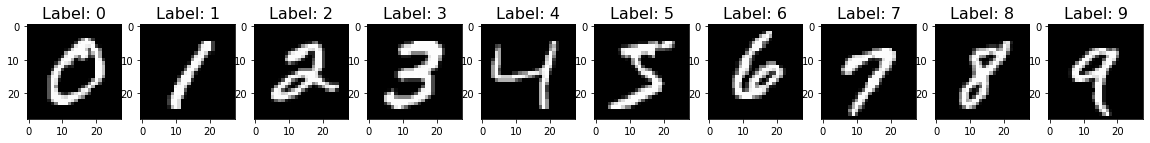

In [ ]:
# Vizualizando as labels
num_classes=10
f, ax = plt.subplots(1, num_classes, figsize=(20,20))

for i in range(0,num_classes):
  sample = x_train[y_train == i][0]
  ax[i].imshow(sample,cmap='gray')
  ax[i].set_title('Label: {}'.format(i), fontsize=16)

In [ ]:
# Normalizando os dados das features
x_train = x_train / 255.0
x_test = x_test / 255.0

In [ ]:
# Mudando o formato dos dados para facilitar o processamento
x_train = np.expand_dims(x_train, axis=3)
x_test = np.expand_dims(x_test, axis=3)

Testes com uma CNN (Convolutional Neural Network)

In [ ]:
# Construindo o modelo

num_filters = 8
filter_size = 3
pool_size = 2

model = models.Sequential([
  layers.Conv2D(num_filters, filter_size, input_shape=(28, 28, 1)),
  layers.MaxPooling2D(pool_size=pool_size),
  layers.Flatten(),
  layers.Dense(10, activation='softmax'),
])

In [ ]:
# Resumo do modelo
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 8)         80        
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 8)        0         
 )                                                               
                                                                 
 flatten_2 (Flatten)         (None, 1352)              0         
                                                                 
 dense_4 (Dense)             (None, 10)                13530     
                                                                 
Total params: 13,610
Trainable params: 13,610
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compilando o modelo
model.compile(
  'adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

In [ ]:
# Treinando o modelo
epochs=7
model.fit(
  x_train,
  to_categorical(y_train),
  epochs=epochs,
  validation_data=(x_test, to_categorical(y_test)),
)

Epoch 1/7
1875/1875 [==============================] - 20s 10ms/step - loss: 0.3416 - accuracy: 0.9038 - val_loss: 0.2057 - val_accuracy: 0.9415
Epoch 2/7
1875/1875 [==============================] - 20s 11ms/step - loss: 0.1805 - accuracy: 0.9477 - val_loss: 0.1431 - val_accuracy: 0.9573
Epoch 3/7
1875/1875 [==============================] - 18s 10ms/step - loss: 0.1302 - accuracy: 0.9626 - val_loss: 0.1132 - val_accuracy: 0.9672
Epoch 4/7
1875/1875 [==============================] - 19s 10ms/step - loss: 0.1036 - accuracy: 0.9702 - val_loss: 0.1032 - val_accuracy: 0.9681
Epoch 5/7
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0887 - accuracy: 0.9744 - val_loss: 0.0915 - val_accuracy: 0.9717
Epoch 6/7
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0784 - accuracy: 0.9768 - val_loss: 0.0872 - val_accuracy: 0.9746
Epoch 7/7
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0705 - accuracy: 0.9796 - val_loss: 0.0847 - val_ac

In [ ]:
# Predição das cinco primeiras imagens de teste
predictions = model.predict(x_test[:5])

# Imprime as predições do nosso modelo
print(np.argmax(predictions, axis=1))

# Imprime os verdadeiros valores das labels
print(y_test[:5]) # [7, 2, 1, 0, 4]

[7 2 1 0 4]
[7 2 1 0 4]


Testes com uma RNN (Recurrent Neural Network)

In [ ]:
# Reformatando os dados para testes com RNN
x_train = np.reshape(x_train,[-1, 28, 28])
x_test = np.reshape(x_test,[-1, 28, 28])

In [ ]:
# Construindo o modelo
model_rnn = models.Sequential([
  layers.SimpleRNN(256, input_shape=(28,28)),
  layers.Dense(10, activation='softmax'),
])


In [ ]:
# Compilando o modelo
model_rnn.compile(
  'sgd',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

In [ ]:
epochs=7
model_rnn.fit(
  x_train,
  to_categorical(y_train),
  epochs=epochs,
  batch_size=128,
  validation_data=(x_test, to_categorical(y_test))
)

Epoch 1/7
469/469 [==============================] - 33s 68ms/step - loss: 0.6776 - accuracy: 0.8150 - val_loss: 0.3142 - val_accuracy: 0.9132
Epoch 2/7
469/469 [==============================] - 31s 67ms/step - loss: 0.2705 - accuracy: 0.9237 - val_loss: 0.2269 - val_accuracy: 0.9346
Epoch 3/7
469/469 [==============================] - 31s 67ms/step - loss: 0.1998 - accuracy: 0.9421 - val_loss: 0.1662 - val_accuracy: 0.9535
Epoch 4/7
469/469 [==============================] - 31s 67ms/step - loss: 0.1634 - accuracy: 0.9535 - val_loss: 0.1964 - val_accuracy: 0.9375
Epoch 5/7
469/469 [==============================] - 31s 67ms/step - loss: 0.1412 - accuracy: 0.9585 - val_loss: 0.1324 - val_accuracy: 0.9614
Epoch 6/7
469/469 [==============================] - 32s 69ms/step - loss: 0.1273 - accuracy: 0.9623 - val_loss: 0.1171 - val_accuracy: 0.9641
Epoch 7/7
469/469 [==============================] - 31s 67ms/step - loss: 0.1127 - accuracy: 0.9671 - val_loss: 0.1120 - val_accuracy: 0.9655

In [ ]:
# Predição das cinco primeiras imagens de teste
predictions = model_rnn.predict(x_test[:5])

# Imprime as predições do nosso modelo
print(np.argmax(predictions, axis=1))

# Imprime os verdadeiros valores das labels
print(y_test[:5]) # [7, 2, 1, 0, 4]

[7 2 1 0 4]
[7 2 1 0 4]
